In [1]:
import warnings
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'  # Suppresses INFO (1), WARNING (2), and ERROR (3)
warnings.filterwarnings("ignore")
from scipy.interpolate import make_interp_spline, interp1d
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

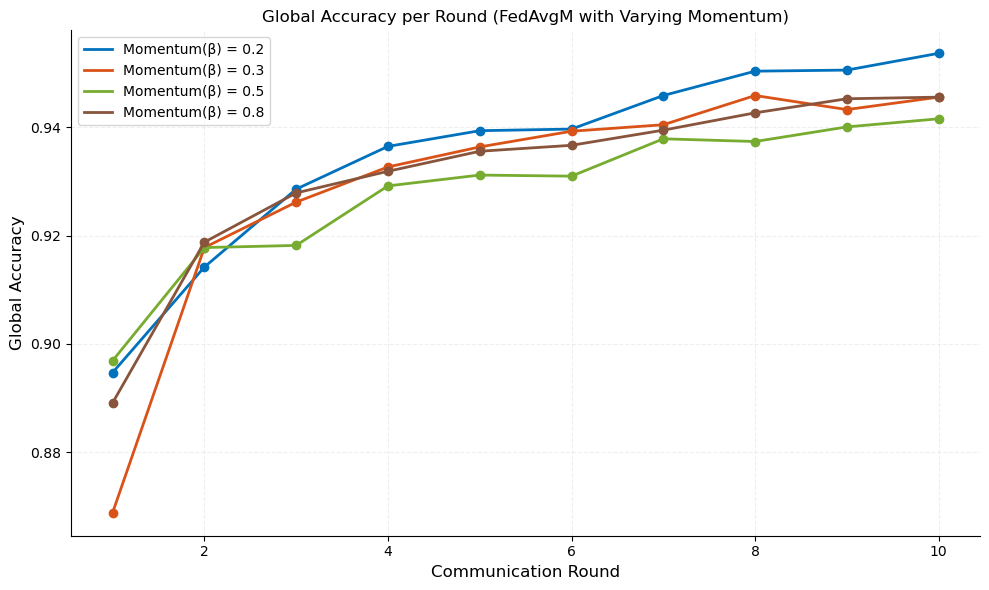

In [ ]:
accuracy_dict = {
    0.2: [0.8947, 0.9142, 0.9286, 0.9365, 0.9394, 0.9397, 0.9459, 0.9504, 0.9506, 0.9537],
    0.3: [0.8688, 0.9178, 0.9262, 0.9327, 0.9364, 0.9393, 0.9405, 0.9459, 0.9433, 0.9456],
    0.5: [0.8969, 0.9178, 0.9182, 0.9292, 0.9312, 0.9310, 0.9379, 0.9374, 0.9401, 0.9416],
    0.8: [0.8891, 0.9188, 0.9279, 0.9319, 0.9356, 0.9367, 0.9395, 0.9427, 0.9453, 0.9456],  
}

colors = {
    0.1: '#ed1c24',
    0.2: '#0072bd',
    0.3: '#d95319',
    0.4: '#ff69b4',
    0.5: '#77ac30',
    0.6: '#808080',
    0.8: '#88543c'
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for momentum, accuracies in accuracy_dict.items():
    rounds_np = np.array(rounds)
    accuracies_np = np.array(accuracies)

    # Smooth line via linear interpolation
    interpolator = interp1d(rounds_np, accuracies_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    accuracies_smooth = interpolator(rounds_smooth)

    # Plot smooth line
    ax.plot(rounds_smooth, accuracies_smooth, color=colors[momentum], label=f"Momentum(β) = {momentum}", linewidth=2)

    # Plot actual data points
    ax.plot(rounds_np, accuracies_np, marker='o', linestyle='None', color=colors[momentum], markersize=6)

# Style
ax.set_title("Global Accuracy per Round (FedAvgM with Varying Momentum)", fontsize=12)
ax.set_xlabel("Communication Round\n(Experiments with 15 clients, local_epochs = 1 to 5, total rounds = 10)", fontsize=12)
ax.set_ylabel("Global Accuracy", fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.2)
ax.legend(title="", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.savefig("momentum_plot.svg", format='svg')
plt.show()


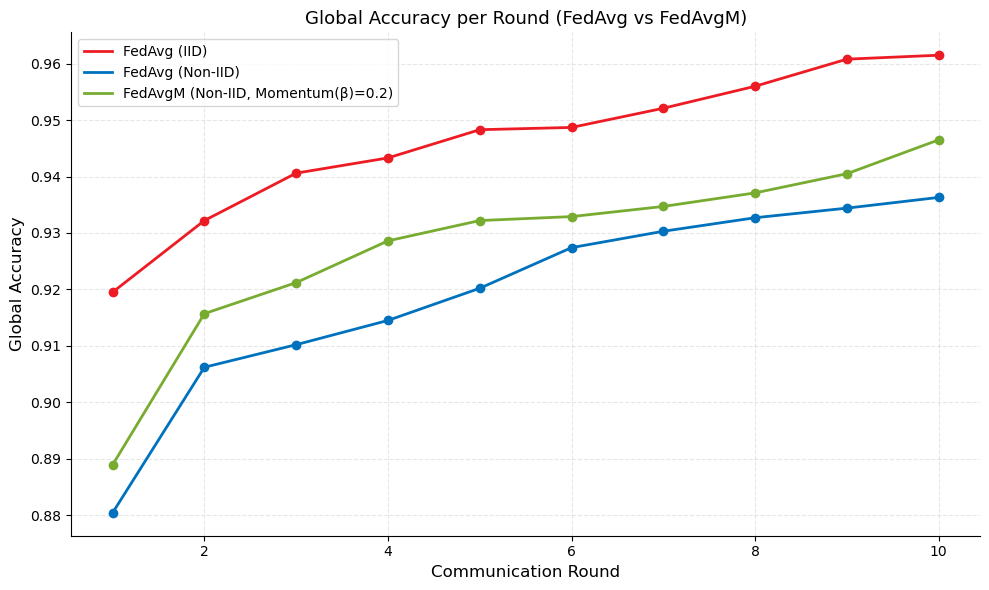

In [3]:
accuracy_dict = {
    'FedAvg (IID)': [0.9195, 0.9322, 0.9406, 0.9433, 0.9483, 0.9487, 0.9521, 0.956, 0.9608, 0.9615],
    'FedAvg (Non-IID)': [0.8804, 0.9062, 0.9102, 0.9145, 0.9202, 0.9274, 0.9303, 0.9327, 0.9344, 0.9363],
    'FedAvgM (Non-IID, Momentum(β)=0.2)': [0.8889, 0.9157, 0.9212, 0.9286, 0.9322, 0.9329, 0.9347, 0.9371, 0.9405, 0.9465],
}

# Assign colors to each method manually (from your palette)
custom_colors = {
    'FedAvg (IID)': '#ed1c24',          # Red (0.1)
    'FedAvg (Non-IID)': '#0072bd',      # Blue (0.2)
    'FedAvgM (Non-IID, Momentum(β)=0.2)': '#77ac30'  
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for label, accuracies in accuracy_dict.items():
    rounds_np = np.array(rounds)
    accuracies_np = np.array(accuracies)

    # Smooth line via linear interpolation
    interpolator = interp1d(rounds_np, accuracies_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    accuracies_smooth = interpolator(rounds_smooth)

    # Plot smooth line
    ax.plot(rounds_smooth, accuracies_smooth, color=custom_colors[label], label=label, linewidth=2)

    # Plot actual data points
    ax.plot(rounds_np, accuracies_np, marker='o', linestyle='None', color=custom_colors[label], markersize=6)

# Style
ax.set_title("Global Accuracy per Round (FedAvg vs FedAvgM)", fontsize=13)
ax.set_xlabel("Communication Round\n(Experiments with 10 clients, local_epochs = 5 for FedAvg & 1 to 5 for FedAvg(Non-IID) \nand FedAvgM(Non-IID,Momentum(β) = 0.2) , total rounds = 10)", fontsize=12)
ax.set_ylabel("Global Accuracy", fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(title="", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.savefig("client_10_global_accuracy_plot.svg", format='svg')
plt.show()


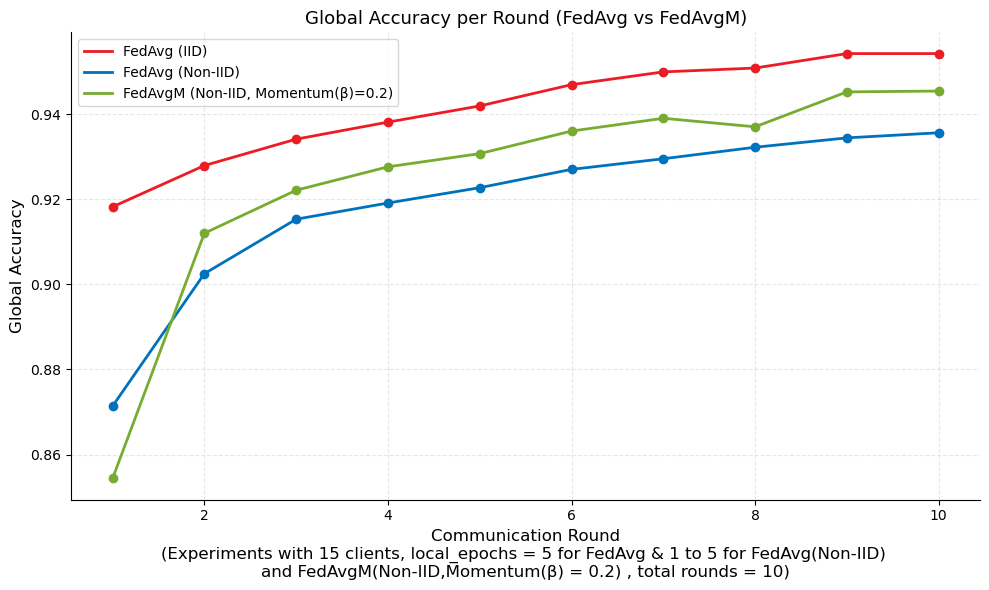

In [2]:
accuracy_dict = {
    'FedAvg (IID)': [0.9182, 0.9279, 0.9341, 0.9381, 0.9419, 0.9469, 0.9499, 0.9508, 0.9542, 0.9542],
    'FedAvg (Non-IID)': [0.8714, 0.9025, 0.9153, 0.9191, 0.9227, 0.927, 0.9295, 0.9322, 0.9344, 0.9356],
    'FedAvgM (Non-IID, Momentum(β)=0.2)': [0.8544, 0.912, 0.9221, 0.9276, 0.9307, 0.936, 0.939, 0.937, 0.9452, 0.9454],
}

# Assign colors to each method manually (from your palette)
custom_colors = {
    'FedAvg (IID)': '#ed1c24',          # Red (0.1)
    'FedAvg (Non-IID)': '#0072bd',      # Blue (0.2)
    'FedAvgM (Non-IID, Momentum(β)=0.2)': '#77ac30'  
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for label, accuracies in accuracy_dict.items():
    rounds_np = np.array(rounds)
    accuracies_np = np.array(accuracies)

    # Smooth line via linear interpolation
    interpolator = interp1d(rounds_np, accuracies_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    accuracies_smooth = interpolator(rounds_smooth)

    # Plot smooth line
    ax.plot(rounds_smooth, accuracies_smooth, color=custom_colors[label], label=label, linewidth=2)

    # Plot actual data points
    ax.plot(rounds_np, accuracies_np, marker='o', linestyle='None', color=custom_colors[label], markersize=6)

# Style
ax.set_title("Global Accuracy per Round (FedAvg vs FedAvgM)", fontsize=13)
ax.set_xlabel("Communication Round\n(Experiments with 15 clients, local_epochs = 5 for FedAvg & 1 to 5 for FedAvg(Non-IID) \nand FedAvgM(Non-IID,Momentum(β) = 0.2) , total rounds = 10)", fontsize=12)
ax.set_ylabel("Global Accuracy", fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(title="", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.savefig("client_15_global_accuracy_plot.svg", format='svg')
plt.show()

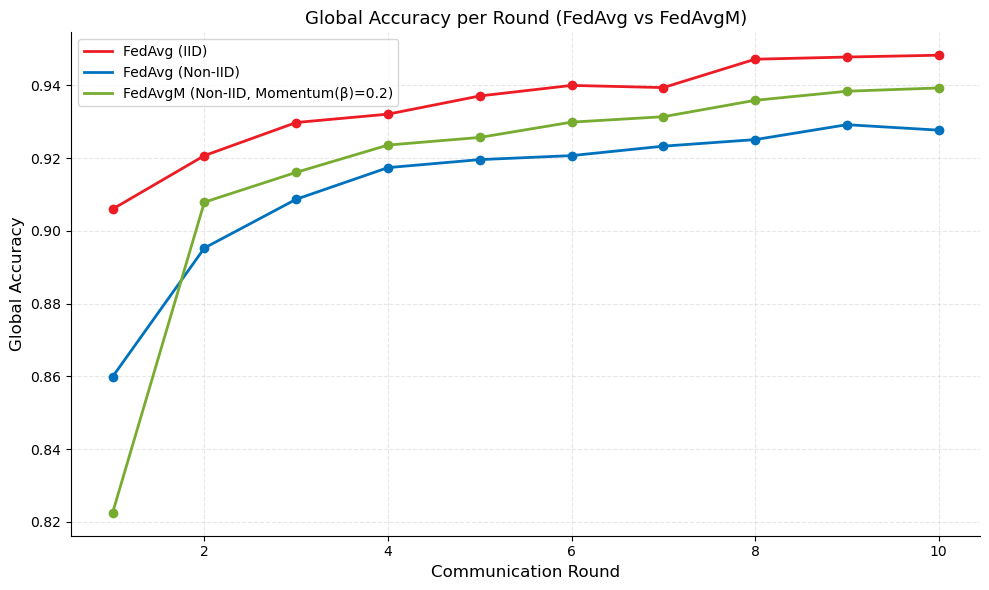

In [5]:
accuracy_dict = {
    'FedAvg (IID)': [0.906, 0.9207, 0.9298, 0.9321, 0.9371,0.94, 0.9394, 0.9472, 0.9478, 0.9483],
    'FedAvg (Non-IID)': [0.8599, 0.8953, 0.9087, 0.9174, 0.9196,0.9207, 0.9233, 0.9251, 0.9292, 0.9277],
    'FedAvgM (Non-IID, Momentum(β)=0.2)': [ 0.8225, 0.9079, 0.9161, 0.9236, 0.9257, 0.9299, 0.9314, 0.9359, 0.9384, 0.9393],
}

# Assign colors to each method manually (from your palette)
custom_colors = {
    'FedAvg (IID)': '#ed1c24',          # Red (0.1)
    'FedAvg (Non-IID)': '#0072bd',      # Blue (0.2)
    'FedAvgM (Non-IID, Momentum(β)=0.2)': '#77ac30'  
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for label, accuracies in accuracy_dict.items():
    rounds_np = np.array(rounds)
    accuracies_np = np.array(accuracies)

    # Smooth line via linear interpolation
    interpolator = interp1d(rounds_np, accuracies_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    accuracies_smooth = interpolator(rounds_smooth)

    # Plot smooth line
    ax.plot(rounds_smooth, accuracies_smooth, color=custom_colors[label], label=label, linewidth=2)

    # Plot actual data points
    ax.plot(rounds_np, accuracies_np, marker='o', linestyle='None', color=custom_colors[label], markersize=6)

# Style
ax.set_title("Global Accuracy per Round (FedAvg vs FedAvgM)", fontsize=13)
ax.set_xlabel("Communication Round\n(Experiments with 20 clients, local_epochs = 5 for FedAvg & 1 to 5 for FedAvg(Non-IID) \nand FedAvgM(Non-IID,Momentum(β) = 0.2) , total rounds = 10)", fontsize=12)
ax.set_ylabel("Global Accuracy", fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(title="", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.savefig("client_20_global_accuracy_plot.svg", format='svg')
plt.show()

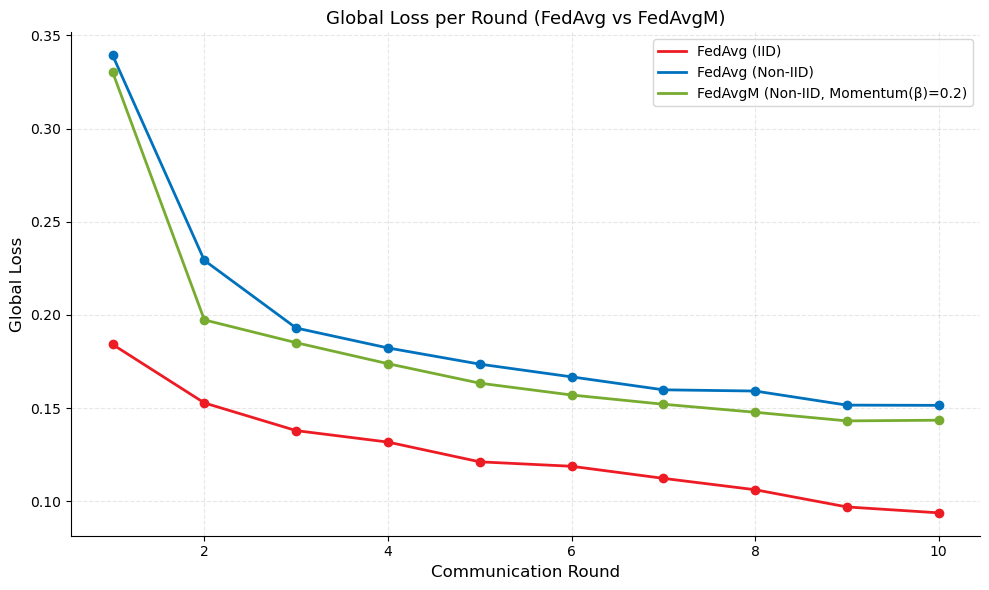

In [6]:
loss_dict = {
    'FedAvg (IID)': [0.184206, 0.152835, 0.137988, 0.13184, 0.121244, 0.118866, 0.112381, 0.106281, 0.09705, 0.093881],
    'FedAvg (Non-IID)': [0.339342, 0.229274, 0.193016, 0.182325, 0.173642, 0.166821, 0.159873, 0.159214, 0.151658, 0.151537],
    'FedAvgM (Non-IID, Momentum(β)=0.2)': [0.330324, 0.197373, 0.185143, 0.173884, 0.163433, 0.157089, 0.152133, 0.147833, 0.143204, 0.143567],
}


# Assign colors to each method manually (from your palette)
custom_colors = {
    'FedAvg (IID)': '#ed1c24',          # Red (0.1)
    'FedAvg (Non-IID)': '#0072bd',      # Blue (0.2)
    'FedAvgM (Non-IID, Momentum(β)=0.2)': '#77ac30'  
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for label, losses in loss_dict.items():
    rounds_np = np.array(rounds)
    losses_np = np.array(losses)

    # Smooth line via linear interpolation
    interpolator = interp1d(rounds_np, losses_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    losses_smooth = interpolator(rounds_smooth)

    # Plot smooth line
    ax.plot(rounds_smooth, losses_smooth, color=custom_colors[label], label=label, linewidth=2)

    # Plot actual data points
    ax.plot(rounds_np, losses_np, marker='o', linestyle='None', color=custom_colors[label], markersize=6)

# Style
ax.set_title("Global Loss per Round (FedAvg vs FedAvgM)", fontsize=13)
ax.set_xlabel("Communication Round\n(Experiments with 10 clients, local_epochs = 5 for FedAvg & 1 to 5 for FedAvg(Non-IID) \nand FedAvgM(Non-IID,Momentum(β) = 0.2) , total rounds = 10)", fontsize=12)
ax.set_ylabel("Global Loss", fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(title="", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.savefig("client_10_global_loss_plot.svg", format='svg')
plt.show()

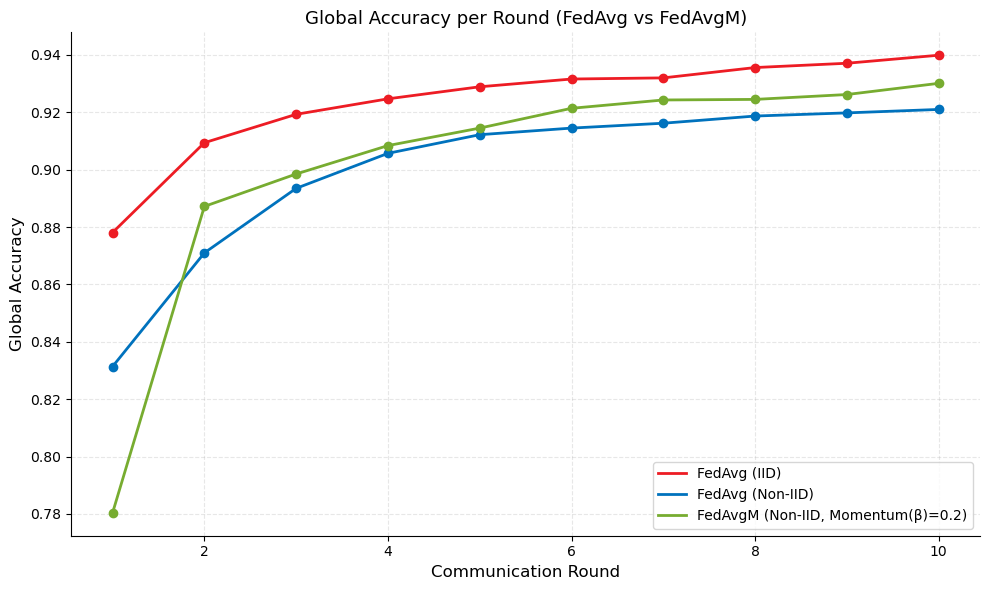

In [7]:
accuracy_dict = {
    'FedAvg (IID)': [0.8781, 0.9094, 0.9193, 0.9247, 0.9289, 0.9316, 0.932, 0.9356, 0.9371, 0.9399],
    'FedAvg (Non-IID)': [0.8314, 0.871, 0.8935, 0.9057, 0.9122, 0.9145, 0.9162, 0.9187, 0.9198, 0.921],
    'FedAvgM (Non-IID, Momentum(β)=0.2)': [0.7804, 0.8872, 0.8985, 0.9084, 0.9145, 0.9214, 0.9243, 0.9245, 0.9262, 0.9301],
}

# Assign colors to each method manually (from your palette)
custom_colors = {
    'FedAvg (IID)': '#ed1c24',          # Red (0.1)
    'FedAvg (Non-IID)': '#0072bd',      # Blue (0.2)
    'FedAvgM (Non-IID, Momentum(β)=0.2)': '#77ac30'  
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for label, accuracies in accuracy_dict.items():
    rounds_np = np.array(rounds)
    accuracies_np = np.array(accuracies)

    # Smooth line via linear interpolation
    interpolator = interp1d(rounds_np, accuracies_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    accuracies_smooth = interpolator(rounds_smooth)

    # Plot smooth line
    ax.plot(rounds_smooth, accuracies_smooth, color=custom_colors[label], label=label, linewidth=2)

    # Plot actual data points
    ax.plot(rounds_np, accuracies_np, marker='o', linestyle='None', color=custom_colors[label], markersize=6)

# Style
ax.set_title("Global Accuracy per Round (FedAvg vs FedAvgM)", fontsize=13)
ax.set_xlabel("Communication Round\n(Experiments with 10 clients, local_epochs = 1, total rounds = 10, total client participation 80% \n(FedAvg, FedAvg with non-iid and FedAvgM with non-iid and momentum(β) = 0.2)", fontsize=12)
ax.set_ylabel("Global Accuracy", fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(title="", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.savefig("client_10_global_accuracy_epoch_1_80_cp_plot.svg", format='svg')
plt.show()


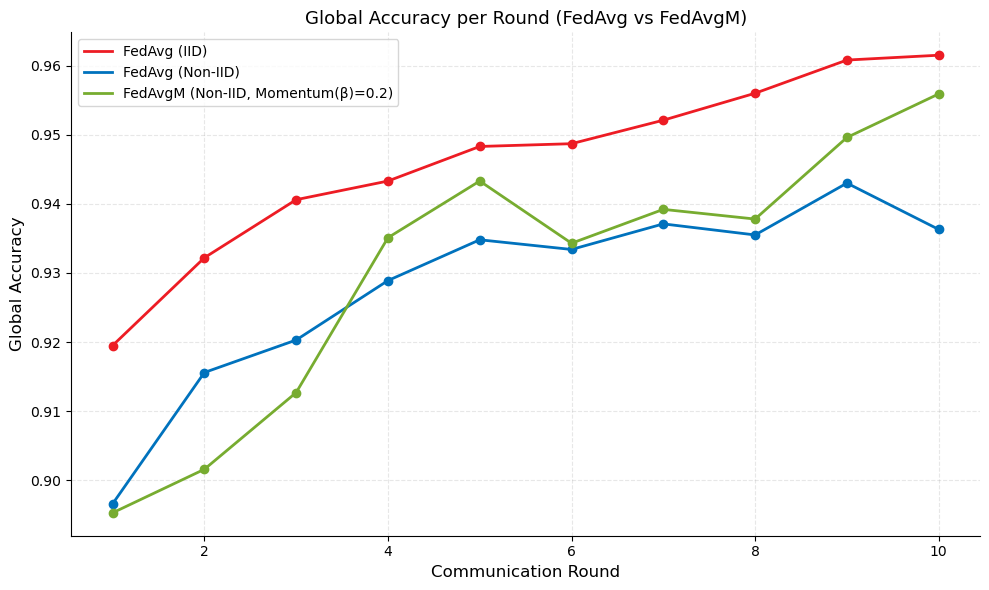

In [8]:
accuracy_dict = {
    'FedAvg (IID)': [0.9195, 0.9322, 0.9406, 0.9433, 0.9483, 0.9487, 0.9521, 0.956, 0.9608, 0.9615],
    'FedAvg (Non-IID)': [0.8966, 0.9156, 0.9203, 0.9289, 0.9348, 0.9334, 0.9371, 0.9355, 0.943, 0.9363],
    'FedAvgM (Non-IID, Momentum(β)=0.2)': [0.8953, 0.9016, 0.9127, 0.9351, 0.9433, 0.9343, 0.9392, 0.9378, 0.9496, 0.9559],
}

# Assign colors to each method manually (from your palette)
custom_colors = {
    'FedAvg (IID)': '#ed1c24',          # Red (0.1)
    'FedAvg (Non-IID)': '#0072bd',      # Blue (0.2)
    'FedAvgM (Non-IID, Momentum(β)=0.2)': '#77ac30'  
}

rounds = np.arange(1, 11)

fig, ax = plt.subplots(figsize=(10, 6), facecolor='white')

for label, accuracies in accuracy_dict.items():
    rounds_np = np.array(rounds)
    accuracies_np = np.array(accuracies)

    # Smooth line via linear interpolation
    interpolator = interp1d(rounds_np, accuracies_np, kind='linear')
    rounds_smooth = np.linspace(rounds_np.min(), rounds_np.max(), 100)
    accuracies_smooth = interpolator(rounds_smooth)

    # Plot smooth line
    ax.plot(rounds_smooth, accuracies_smooth, color=custom_colors[label], label=label, linewidth=2)

    # Plot actual data points
    ax.plot(rounds_np, accuracies_np, marker='o', linestyle='None', color=custom_colors[label], markersize=6)

# Style
ax.set_title("Global Accuracy per Round (FedAvg vs FedAvgM)", fontsize=13)
ax.set_xlabel("Communication Round\n(Experiments with 10 clients, local_epochs = 5, total rounds = 10, total client participation 80% \n(FedAvg, FedAvg with non-iid and FedAvgM with non-iid and momentum(β) = 0.2)", fontsize=12)
ax.set_ylabel("Global Accuracy", fontsize=12)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.grid(True, linestyle='--', alpha=0.3)
ax.legend(title="", fontsize=10, title_fontsize=11)

plt.tight_layout()
plt.savefig("client_10_global_accuracy_epoch_5_80_cp_plot.svg", format='svg')
plt.show()
